# Nutrition Data

In [27]:
import json
import numpy as np
import collections
import random
import re
import pandas as pd
from matplotlib import pyplot

In [3]:
# Opening JSON file
# returns JSON object as a dictionary
f = open('1M_recipes_with_nutritional_info.json',)
data = json.load(f)

In [4]:
len(data)

51235

The 1M+ paper said they obtained 50,637 recipe with nutritional inforamtion. The length of the '1M_recipes_with_nutritional_info.json' file, however, is 51,235.

### Data Distribution

In [49]:
def NtrDataFlat(df, key):
    ntr_temp = df[key]
    df_ntr = pd.DataFrame.from_dict({(i): ntr_temp[i] for i in ntr_temp.keys()}, orient='index')
    return df.merge(df_ntr, left_index=True, right_index=True)

In [53]:
# iterate to take nutrition data
## nutrition = list of dictionary for nurient data
## fsa = fsa_lights_per100g
## df_ntr = panda table of nutrition

nutrition = []
for i in range(0,len(data)):
    dic = {'id':None, 'nutr_values_per100g':None}
    dic['id'] = data[i]['id']
    dic['nutr_values_per100g'] = data[i]["nutr_values_per100g"]
    nutrition.append(dic)

fsa = []
for i in range(0,len(data)):
    dic = {'id':None, 'fsa_lights_per100g':None}
    dic['id'] = data[i]['id']
    dic['fsa_lights_per100g'] = data[i]["fsa_lights_per100g"]
    fsa.append(dic)
    
df_ntr = NtrDataFlat(pd.DataFrame.from_dict(nutrition), "nutr_values_per100g")
df_fsa = NtrDataFlat(pd.DataFrame.from_dict(fsa), "fsa_lights_per100g")

In [52]:
df_ntr.head(2)

,id,nutr_values_per100g,energy,fat,protein,salt,saturates,sugars
0,000095fc1d,"{'energy': 81.12946131894766, 'fat': 2.1401392...",81.129461,2.140139,6.914437,0.055978,0.365347,5.086341
1,00051d5b9d,"{'energy': 477.09640393594606, 'fat': 23.41248...",477.096404,23.412486,7.625492,0.548621,3.425054,14.298443


In [51]:
df_fsa.head(2)

,id,fsa_lights_per100g,fat,salt,saturates,sugars
0,000095fc1d,"{'fat': 'green', 'salt': 'green', 'saturates':...",green,green,green,orange
1,00051d5b9d,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",red,orange,orange,orange


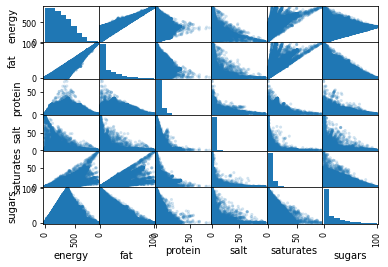

In [39]:
#plot distribution -- origianl
pd.plotting.scatter_matrix(df_ntr[['energy','fat','protein','salt','saturates','sugars']], alpha=0.2);

### Error Data Check
When checking the recipe with very extreme nutrient nutrient value, we found that some of the nutrition data doesn't seems right. For example, recipe 40b429f72d Canned Venison contains only nutrient value for salt while the actual nutrient value in the origianl website shows high protein value as well.

In [86]:
# save the nutrition_per_100g as 0 and 1 list
## 1 = with values > 0

list_id = []
list_nutr = []

for dic in nutrition:
    for k, v in dic.items():
        if k == 'id':
            list_id.append(v)
        else:
            list_nutr.append(list(v.values()))            

# turn the list to 1/0
list_nutr = [[1 if x > 0 else 0 for x in l] for l in list_nutr] 

In [87]:
# count the number of none-null nutrition values
nutr_sum = []
for i in list_nutr:
    s = sum(i)
    nutr_sum.append(s)
    
# frequency
counter = collections.Counter(nutr_sum)
counter

Counter({6: 49941, 3: 309, 4: 207, 5: 691, 1: 52, 2: 35})

Amount the 51,235 nutrition data: 52 records with only 1 nutrient value; 35 records with only 2 nutrient value. Below is the list of recipe title which the recipe only contain single nutrition value. There are some non-recipe instruction somehow occur in the recipe website and thus pulled into the 1M+ data (such as Nif's Anti-Itching Cream).
</br>

Below is the list of recipe name with only one nutrient value available. 

In [89]:
# get the name of recipe with only 1 nutrition value
index_nutr_val_one = [i for i, e in enumerate(nutr_sum) if e == 1]

for idx in index_nutr_val_one:
    recp_id = list_id[idx]
    for dic in data:
        if dic['id'] == recp_id:
            print(dic['title'])

Blueberry Ice Tea Recipe
Ice Cubes
Nif's Anti-Itching Cream (Paste)
Salts 'n' Soda Bath Soak
Boiled Crawfish (Spiny Lobster Tails) Recipe
Recipe no longer on file Recipe aricat
Homemade Saline Nose Drops
Neti Pot Saline Solution
Homemade Candied Citrus Peel
Canned Venison Recipe
Eating Out
Easy Homemade Mouthwash!
Ice Cubes
Homemade Nose Drops
Simple Mosquito Bite Remedy
Salt Water Flush
How To Proof Bread Dough (Rise)
Eating Out
Salt Dough Ornaments Recipe
Salted Boiling Water - What Does It Mean?
Sea Salt
Heartburn Remedy
Beef Tea (British) Recipe
Sweeten the Catch
Bubble Gum Ice Tea Recipe
Cashew Milk and Cashew Flour
How to Boil Corn on the Cob
Coconut Water Kefir
Drip Coffee Maker Cleaner
Leftovers
Brining Solution for Poultry and Meat
Salt Soup
Beef Roasted In Salt Crust Recipe
Sea Cure for Pimples
Ice Cubes
My Easy Cure to an Oncoming Cough and Cold
Leftovers
Soda Pop Ice
Blueberry Ice Tea Recipe
Tap Water
Sore Throat Gargle
Hibiscus Granita
Bee or Wasp Sting Soother
Homemade No

### Estimating Error Size

The nutrition data in 1M+ generated by extracting the recipe ingredients and merge the nutritent contents of each indredient from USDA witht he recipe ingredients. From the source recipe, only ingredients with "amount-unit-ingredient name" format are extracted to the 1M data set. Therefore, for recipe without such ingredient format, those ingredient will not be extracted to the data set. 

Take 382 (~400) random samples from the 5,1235 recipes. Search for the number of ingredients not listed in the ingredient list but does show in the instruction.

In [90]:
random.seed(10)
samp_data = random.sample(data,400)

In [92]:
#export to excel
#dic_instr = FindUnmatchWord(samp_data)

dict_url = {}
for dicts in samp_data:
    ids = dicts['id']
    dict_url[ids] = dicts['url']

import csv

with open('sample_url.csv', 'w') as f:
    for key in dict_url.keys():
        f.write("%s,%s\n"%(key,dict_url[key]))

By looking more detail into the recipe, we found that all the recipe from www.food.com if having ingredient amount in a fraction (1/2, 1/3, etc. ), the number was pulled missing the "/". That is 1/2 will become 12. And www.food.com contributes about 55% of the total recipes.

## Healthiness Ranking

### UK FSA Traffic Light Label System

The 1M+ recipe data includes a FSA traffic light label for each recipe. The traffic light nutrition lebeling system was introduced in 2013 by UK Health Ministers. The voluntary multiple traffic light label (MTL) is a colour-coded system which shows at a glance whether a product is high (**red**) medium (**amber**) or low (**green**) in *fat*, *saturated fat*, *salt* and *sugars*.
</br>

The traffic light label can also be converted into a single score to indicate the overall healthy level of a sprcific food. The procedure developed by Sacks et al. assign an integer value to each color (green=1, amber=2, and red=3) then sum the score for each macro-nutrient resulting in a final range from 4 (very healthy food) to 12 (very unhealthy food).

In [115]:
fsa_score = []
for dicts in fsa:
    light = dicts['fsa_lights_per100g']
    score = 0
    for k, v in light.items():
        if v == 'green':
            val = 1
        elif v == 'orange':
            val = 2
        elif v == 'red':
            val = 3
        score = score + val
    fsa_score.append(score)

# frequency
df_fsa_freq = pd.DataFrame.from_dict(collections.Counter(fsa_score), orient='index', columns=['freq'])
df_fsa_freq['%'] = df_fsa_freq['freq']*100/51235
df_fsa_freq.sort_index()

,freq,%
4,3254,6.351127
5,5938,11.589734
6,9206,17.968186
7,6950,13.564946
8,8288,16.176442
9,7939,15.495267
10,7409,14.460818
11,1946,3.798185
12,305,0.595296


However, this scoring method does not provide the flexibility to differenceite different types of diet preference such as Keto diet. Thus we need some alternative.

#### USA FDA %Daily Value

The nutrition labeling in the US is present as the Daily nutrition value (DV) which are the recommended amounts of nutrients to consume or not to exceed each day. The %DV is how much a nutrient in a single serving of an individual packaged food or dietary supplement contributes to your daily diet. 
</br>

FDA recommed to use %DV to determine if a serving of the food is high or low in an individual nutrient. As a general guide:
* 5% DV or less of a nutrient per serving is considered low.
* 20% DV or more of a nutrient per serving is considered high.

The %DV can be considered as a standardized value to detemine whether a nutrient per serving is considered low or high. We can use this value to generate socring for different types of dietary needs.

In [ ]:
#set parameters
parameter = [0,1,1,-1,-1,-1]

ntr_score = np.array(df_fat)*c1+np.array(df_protein)*c2+np.array(df_salt)*c3+np.array(df_saturates)*c4+np.array(df_sugars)*c5

In [ ]:
pyplot.hist(ntr_score, bins=50)

In [ ]:
max_value = min(ntr_score)
max_index = np.where(ntr_score == max_value)
max_index
#np.where(ntr_score < -16)
#nutrition[max_index[0][0]]

In [ ]:
# high score recipe
high = [ 9513, 30012, 33157, 33993, 42662, 47297]
for i in range(0,len(high)):
    print(data[i]['title'])

In [105]:
next(item for item in data if item["id"] == "04b63bdc75")

{'fsa_lights_per100g': {'fat': 'orange',
  'salt': 'green',
  'saturates': 'red',
  'sugars': 'red'},
 'id': '04b63bdc75',
 'ingredients': [{'text': 'rice, white, long-grain, regular, unenriched, cooked without salt'},
  {'text': 'pretzels, soft, unsalted'},
  {'text': 'nuts, cashew nuts, raw'},
  {'text': 'vanilla extract'},
  {'text': 'spartan, real semi-sweet chocolate baking chips, upc: 011213162966'}],
 'instructions': [{'text': 'Mix cereal, pretzel, and cashews in large bowl; set aside.'},
  {'text': 'Grease 13x9x2 baking dish or pan.'},
  {'text': 'Melt candy coating in 2 quart saucepan over low heat, stirring constantly.'},
  {'text': 'Pour over cereal mixture, stirring until evenly coated.'},
  {'text': 'Press in pan; cool slightly.'},
  {'text': 'Drizzle with melted chocolate chips.'},
  {'text': 'Let stand until chocolate is firm.'},
  {'text': 'Break into clusters.'}],
 'nutr_per_ingredient': [{'fat': 1.76,
   'nrg': 820.0,
   'pro': 17.0,
   'sat': 0.488,
   'sod': 8.0,
  

In [ ]:
#next(item for item in data if item["id"] == "e06fdaf2eb")